In [1]:
import pybaseball as pb
import altair as alt
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse, Polygon

In [2]:
import matplotlib.ticker as mtick

In [3]:
plt.xkcd()

In [4]:
# use pybaseball to bring in batting stats for

bat = pb.batting_stats(2021)
bat = bat.merge(pb.playerid_reverse_lookup(bat.IDfg, key_type="fangraphs"), left_on = "IDfg", right_on='key_fangraphs')

In [5]:
# use altair to quickly sketch and explore the concept

alt.Chart(bat).mark_circle().encode(
    alt.X("O-Swing%", scale=alt.Scale(zero=False)),
    alt.Y("Z-Swing%", scale=alt.Scale(zero=False)),
    tooltip=["Name", "Team", "OPS"]
)

alt.Chart(...)

In [6]:
import os

In [7]:
# decided what faces I want to highlight and downloaded the face into the directory as jpgs
notable_names = [f.split(".jpg")[0] for f in os.listdir() if 'jpg' in f]

In [8]:
# plotting utils
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
def getImage(path):
    return OffsetImage(plt.imread(path), zoom=.4)

Text(0.01, 0.01, 'by u/double_dose_larry')

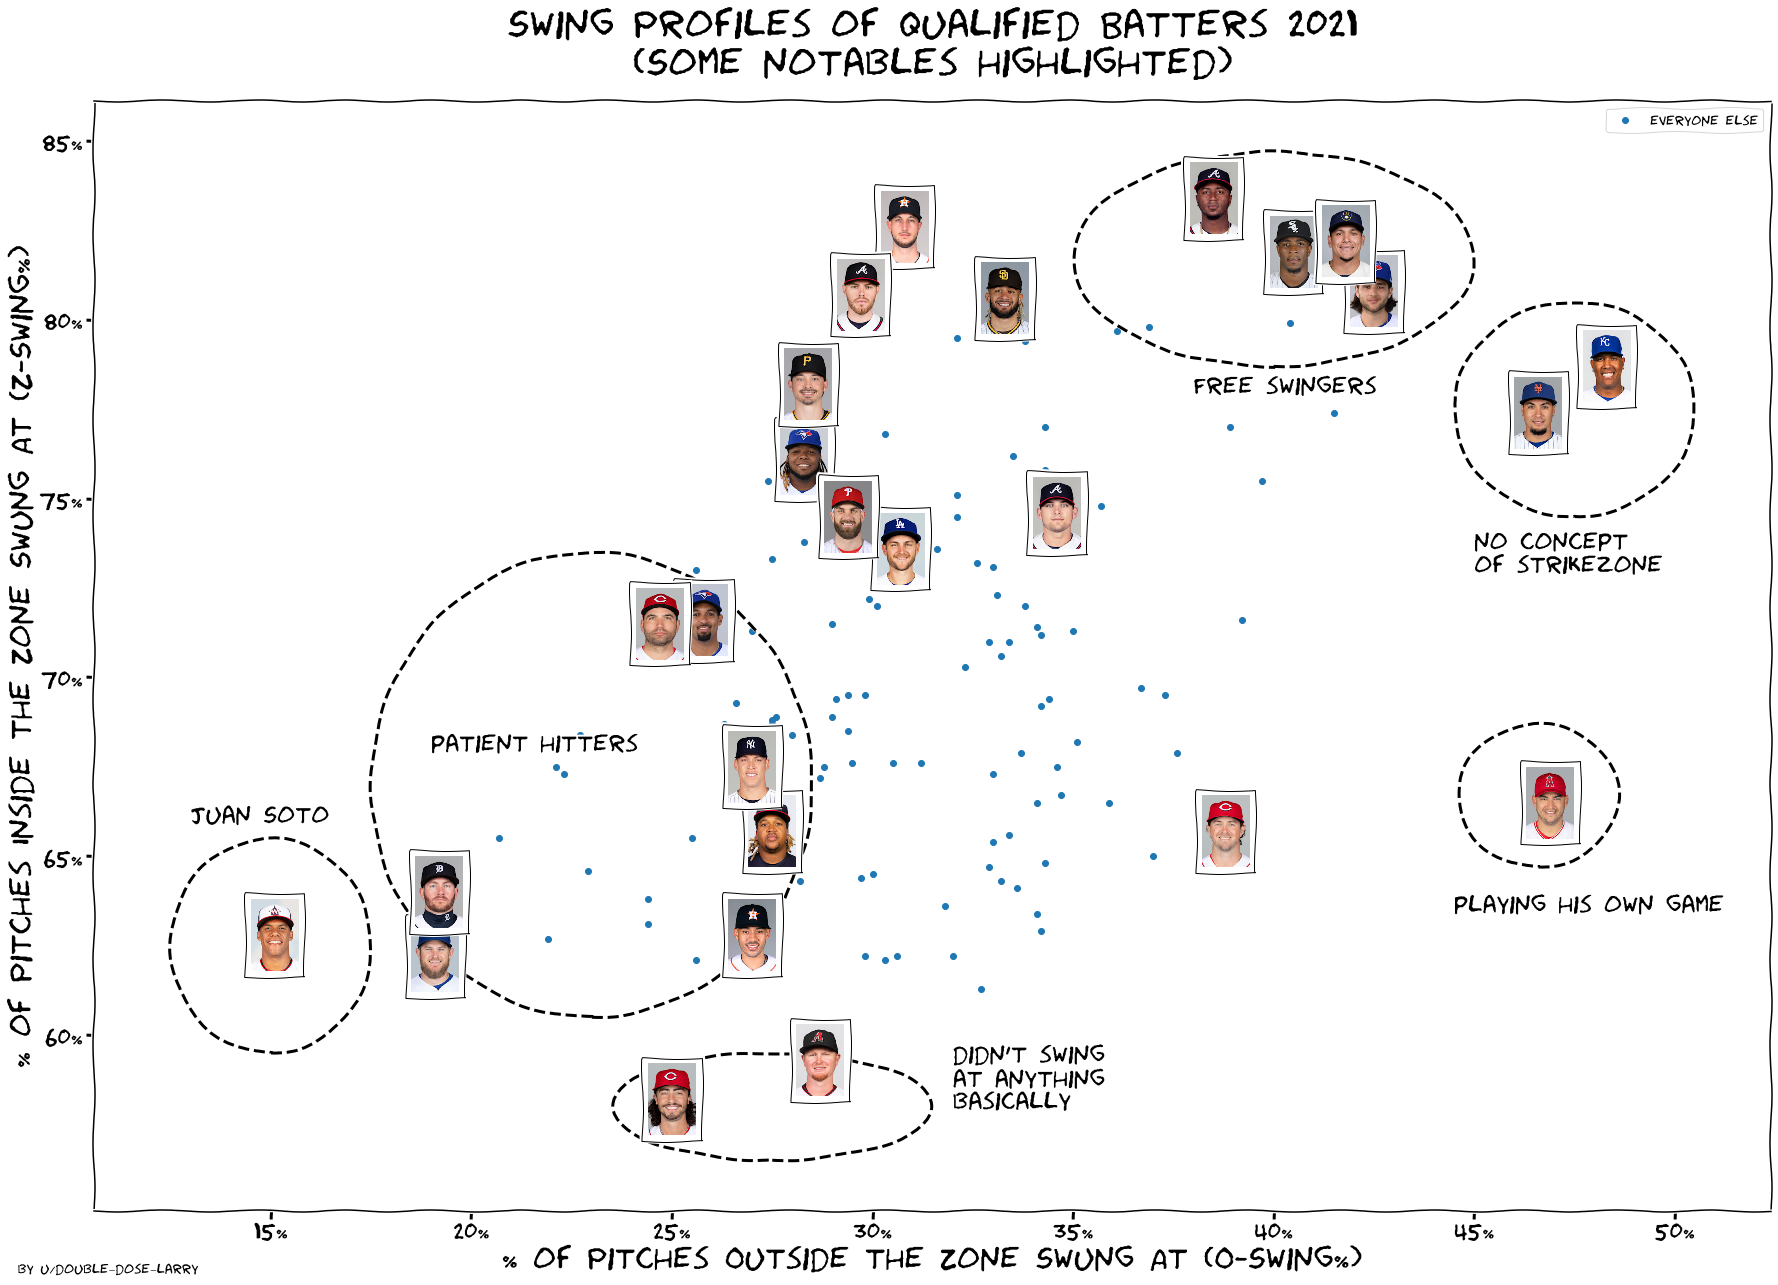

In [9]:
# do the thing

plot_df = bat.rename({
    "O-Swing%" : "o_swing",
    "Z-Swing%" : "z_swing",
}, axis=1)
df_notables = plot_df[plot_df["Name"].isin(notable_names)]



## start plot

f, ax = plt.subplots(figsize=(25,18))
ax.scatter(plot_df["o_swing"],plot_df["z_swing"], label="everyone else")

imgs = [
    ax.add_artist(
        AnnotationBbox(getImage(f'{plr.Name}.jpg'),
                      (plr.o_swing, plr.z_swing),
                       frameon=True
                      )
    )
    for plr in df_notables.itertuples()
]

#annotate Patient hitters
ax.add_patch(Ellipse(xy=(.23,.67), 
                     width=.11, 
                     height=.13, fill=False, ls="--", lw=3))
ax.annotate("patient hitters", (0.19, 0.68), size=25)

#annotate Juan Soto
ax.add_patch(Ellipse(xy=(.15,.625), 
                     width=.05, 
                     height=.06, fill=False, ls="--", lw=3))
ax.annotate("Juan Soto", (0.13, 0.66), size=25)

#free swingers
ax.add_patch(Ellipse(xy=(.4,.817), 
                     width=.1, 
                     height=.06, fill=False, ls="--", lw=3))
ax.annotate("Free swingers", (0.38, 0.78), size=25)

#what's a stikezone
ax.add_patch(Ellipse(xy=(.475,.775), 
                     width=.06, 
                     height=.06, fill=False, ls="--", lw=3))
ax.annotate("no concept\nof strikezone", (0.45, 0.73), size=25)

#dont swing
ax.add_patch(Ellipse(xy=(.275,.58), 
                     width=.08, 
                     height=.03, fill=False, ls="--", lw=3))
ax.annotate("didn't swing\nat anything\nbasically", (0.32, 0.58), size=25)

#Jose Iglesias
ax.add_patch(Ellipse(xy=(.466,.667), 
                     width=.04, 
                     height=.04, fill=False, ls="--", lw=3))
ax.annotate("playing his own game", (0.445, 0.635), size=25)

ax.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.xaxis.set_major_formatter(mtick.PercentFormatter(xmax=1, decimals=0))
ax.tick_params(axis = 'both', which = 'major', labelsize = 24)
ax.tick_params(axis = 'both', which = 'minor', labelsize = 24)

plt.legend()
plt.xlabel("% of Pitches Outside the Zone Swung At (O-Swing%)", size=32)
plt.ylabel("% of Pitches Inside the Zone Swung At (Z-Swing%)", size=32)
plt.title("Swing Profiles of Qualified Batters 2021\n(Some notables highlighted)", size=40, pad=30)
plt.tight_layout()
plt.annotate("by u/double_dose_larry", (.01,.01), xycoords='figure fraction')
# plt.savefig("swing.png") #uncomment when done tinkering to save